# Day 11

https://adventofcode.com/2020/day/11


## Seat Rules
All decisions are based on the number of occupied seats adjacent to a given seat (one of the eight positions immediately up, down, left, right, or diagonal from the seat). The following rules are applied to every seat simultaneously:

* If a seat is empty (L) and there are no occupied seats adjacent to it, the seat becomes occupied.
* If a seat is occupied (#) and four or more seats adjacent to it are also occupied, the seat becomes empty.
* Otherwise, the seat's state does not change.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

In [6]:

sample_input_1="""L.LL.LL.LL
LLLLLLL.LL
L.L.L..L..
LLLL.LL.LL
L.LL.LL.LL
L.LLLLL.LL
..L.L.....
LLLLLLLLLL
L.LLLLLL.L
L.LLLLL.LL"""

#l1 = [ x.strip() for x in sample_input_1.split('\n')]
input_file="data/day11.txt"
l1 = [ x.strip() for x in open(input_file).readlines()]
width = len(l1[0])
height = len(l1)

print(width,height)
current_img = np.zeros([height,width,3],dtype=np.uint8)

empty_seat = [255,10,10]
ocu_seat   = [0,255,20]
floor   = [0,0,0]

print(l1[0][3])
for x in range(0, width):
    for y in range(0, height):
        t = l1[y][x]
        if t == 'L':
            current_img[y,x] = empty_seat
        elif t == '#':
            current_img[y,x] = ocu_seat
        elif t == '.':
            current_img[y,x] = floor
        else:
            print("no",t)

90 98
L


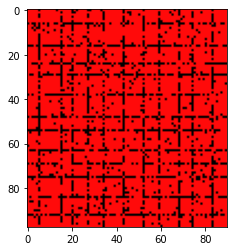

In [7]:
i = plt.imshow(current_img)

stop


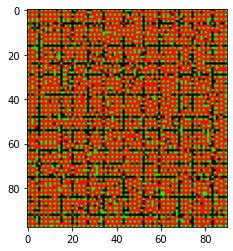

2299


In [8]:
 
def count_seats(x,y,img):
    full=0
    empty=0
    for xx in range(-1,2):
        for yy in range(-1,2):
            _x = x+xx
            _y = y+yy
            if _x < 0 or _x >= width or _y < 0 or _y >=height:
                continue
            if _x == x and _y== y:
                continue
            c = img[_y][_x]
            if all(c == ocu_seat):
                full+=1
            elif all(c == empty_seat):
                empty+=1
    return [empty,full]


new_img = np.copy(current_img)
d = 0
while(True):
    d+=1
    clear_output(wait=True)
    for y in range(0,height):
        for x in range(0, width):
            seat_count = count_seats(x,y, current_img)

            if all(current_img[y][x] == empty_seat) and seat_count[1] == 0:
                new_img[y][x] = ocu_seat
            if all(current_img[y][x] == ocu_seat) and seat_count[1] >=4:
                new_img[y][x] = empty_seat
    
    if np.array_equal( current_img, new_img):
        print("stop")
        break
        
    plt.imshow(current_img)
    plt.show()
    current_img = np.copy(new_img)        
    #plt.imgsave("output/img{}.png".format(d))
    
t=0
for x in range(0, width):
    for y in range(0, height):
        if all(current_img[y][x] == ocu_seat):
            t +=1

plt.imshow(current_img)
plt.show()

print(t)

In [ ]:
list(range(-1,2))

In [ ]:
x = np.zeros([5,10,3],dtype=np.uint8)

# y,x = [c,c,c]
x[0][1] = [90,90,1]
all(x[0][1] == [90,90,1])
#imgplot = plt.imshow(img)
x